<a href="https://colab.research.google.com/github/avii-001/Machine_Learning/blob/main/Loan_Eligibility_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
fname='/content/loan-train.csv'
balance_data=pd.read_csv(fname, sep=',', header=0)

## 1. Exploratory Data Analysis

In [ ]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
feature_names=balance_data.columns[1:12]
y=balance_data.columns[12]
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
def find_data_type(feature_name):
  if balance_data[feature_name].dtype=='object':
    print(balance_data[feature_name].value_counts())

find_data_type('Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [ ]:
for feature_name in feature_names:
  if balance_data[feature_name].dtype=='object':
    print('\n'+feature_name+'-->')
    find_data_type(feature_name)




Gender-->
Male      489
Female    112
Name: Gender, dtype: int64

Married-->
Yes    398
No     213
Name: Married, dtype: int64

Dependents-->
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education-->
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed-->
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area-->
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [ ]:
balance_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print('Rows: ', len(balance_data))
print('Columns: ', len(balance_data.columns))
print('Rows and Columns: ',balance_data.shape)

Rows:  614
Columns:  13
Rows and Columns:  (614, 13)


In [ ]:
import missingno as msno
balance_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
balance_data['Gender'].fillna(balance_data['Gender'].mode().iloc[0],inplace=True)               #Mode has series of mode values in it, hence use iloc[0]
balance_data['Married'].fillna(balance_data['Married'].mode().iloc[0], inplace=True)
balance_data['Self_Employed'].fillna(balance_data['Self_Employed'].mode().iloc[0], inplace=True)
balance_data['Dependents'].fillna(balance_data['Dependents'].mode().iloc[0], inplace=True)

In [ ]:
balance_data['LoanAmount'].fillna(balance_data['LoanAmount'].mean(),inplace=True)
balance_data['Loan_Amount_Term'].fillna(balance_data['Loan_Amount_Term'].mean(),inplace=True)

In [ ]:
balance_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
balance_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col=['Dependents','Property_Area','Credit_History']
le=LabelEncoder()
for col in feature_col:
  balance_data[col]=le.fit_transform(balance_data[col])

In [ ]:
balance_data['Gender']=balance_data['Gender'].replace({"Male":1,"Female":0})
balance_data['Married']=balance_data['Married'].replace({'Yes':1,'No':0})
balance_data["Education"]=balance_data["Education"].replace({"Graduate":1,'Not Graduate':0})
balance_data['Self_Employed']=balance_data['Self_Employed'].replace({'Yes':1,'No':0})
balance_data['Loan_Status']=balance_data['Loan_Status'].replace({"Y":1,"N":0})

balance_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1


In [ ]:
balance_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.936482,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,2.000000,1.000000


## Data Visualization

<ipython-input-17-dced914e41d8>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(balance_data.corr(), cmap="Blues", fmt=".2f",annot=True)


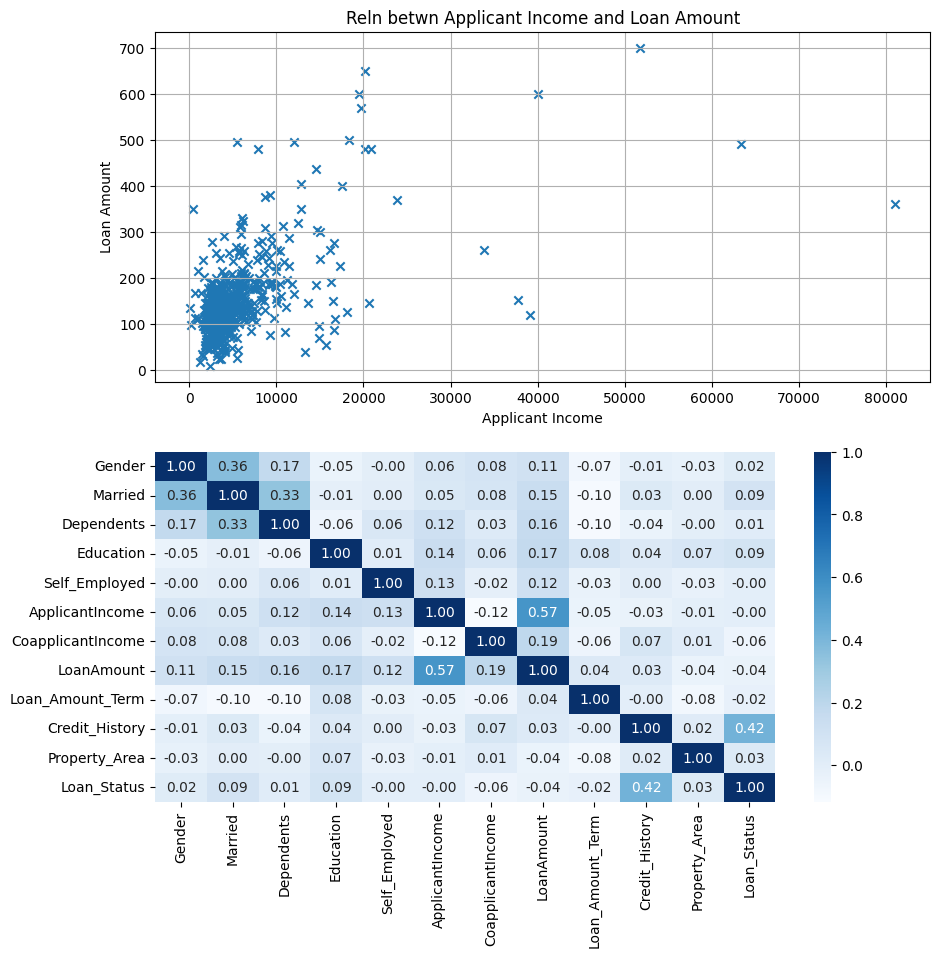

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(balance_data["ApplicantIncome"],balance_data["LoanAmount"],marker='x')
plt.grid()
plt.title('Reln betwn Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

plt.subplot(2,1,2)
# plt.heatmap(balance_data.corr(),cmap='Blues',annot='True',fmt='.1f')
sns.heatmap(balance_data.corr(), cmap="Blues", fmt=".2f",annot=True)


plt.show()

## Train model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [ ]:
#Seperate target variables
train_features=['Credit_History','Education','Married']
X=balance_data[train_features].values
y=balance_data['Loan_Status'].values


In [ ]:
#Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#Training model
logistic_model.fit(X_train,y_train)

LogisticRegression()

## Predict Model

In [ ]:
y_predict=logistic_model.predict(X_test)
y_predict

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
#Check coeff of trained model
print('Coefficient of model: ',logistic_model.coef_)

Coefficient of model:  [[2.45562639 0.31610194 0.51852389]]


## Check Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
score = logistic_model.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8187372708757638
accuracy_score percent : 81.87


In [ ]:
print('Target on test data\n',y_predict)

Target on test data
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1]


In [ ]:
import pickle as pkl

In [ ]:
fname='loan_logistic_model.pkl'
pkl.dump(logistic_model,open(fname,'wb'))